In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
# value counts for categorical data

print(data.sex.value_counts(), '\n', data.sex.value_counts(), '\n', data.children.value_counts(), '\n', data.smoker.value_counts(), '\n', data.region.value_counts() )

male      676
female    662
Name: sex, dtype: int64 
 male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## Replacing the categorical variable with numerical variables

In [6]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Exploratory Data Analysis

# Univariate Analysis

In [8]:
# checking age distribution

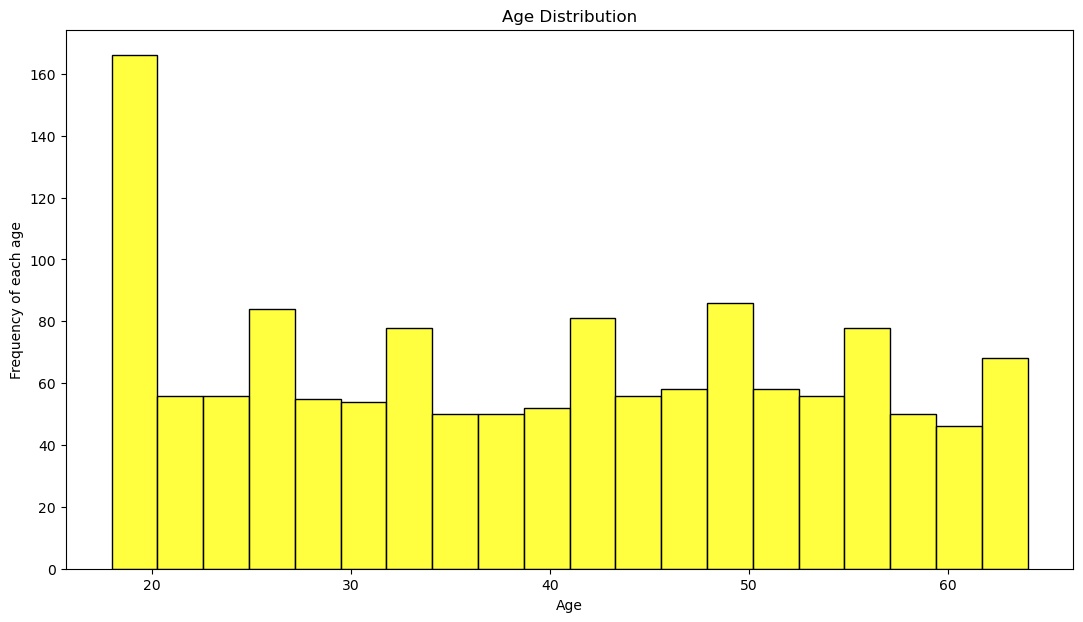

In [15]:
plt.figure(figsize=(13,7))
sns.histplot(data.age, bins = 20, kde = False, color = 'yellow')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each age')
plt.show()

***Maximum people in a dataset have a age below 20.***

Text(0.5, 1.0, 'gender distribution')

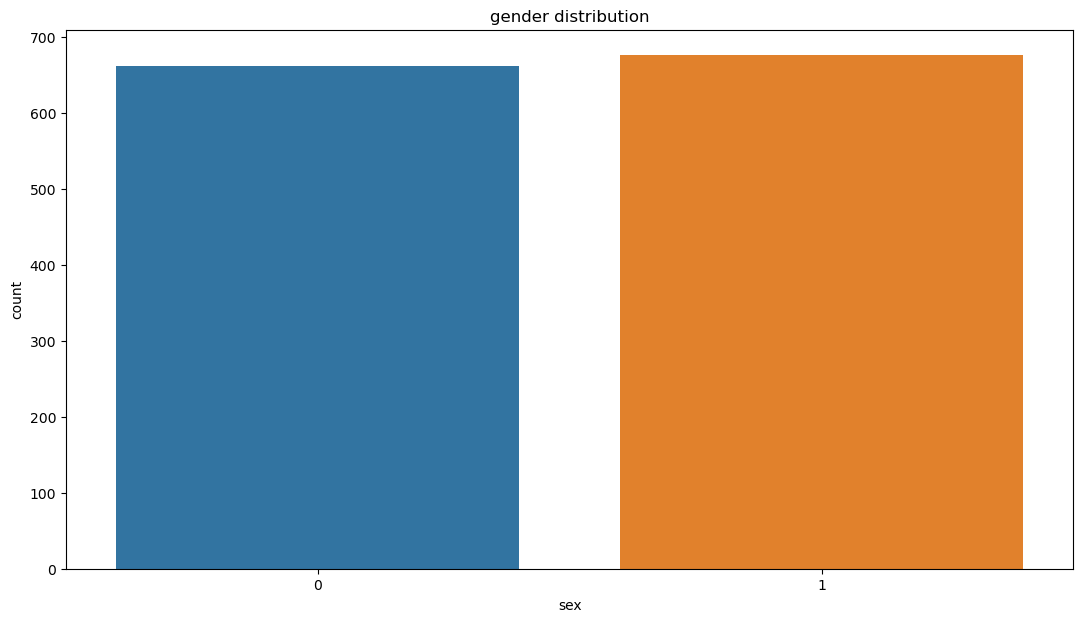

In [12]:
# checking sex distribution

plt.figure(figsize=(13,7))
sns.countplot(x = 'sex', data = data)
plt.title('gender distribution')

In [14]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


***From the above graph we can say that male and female are almost same***

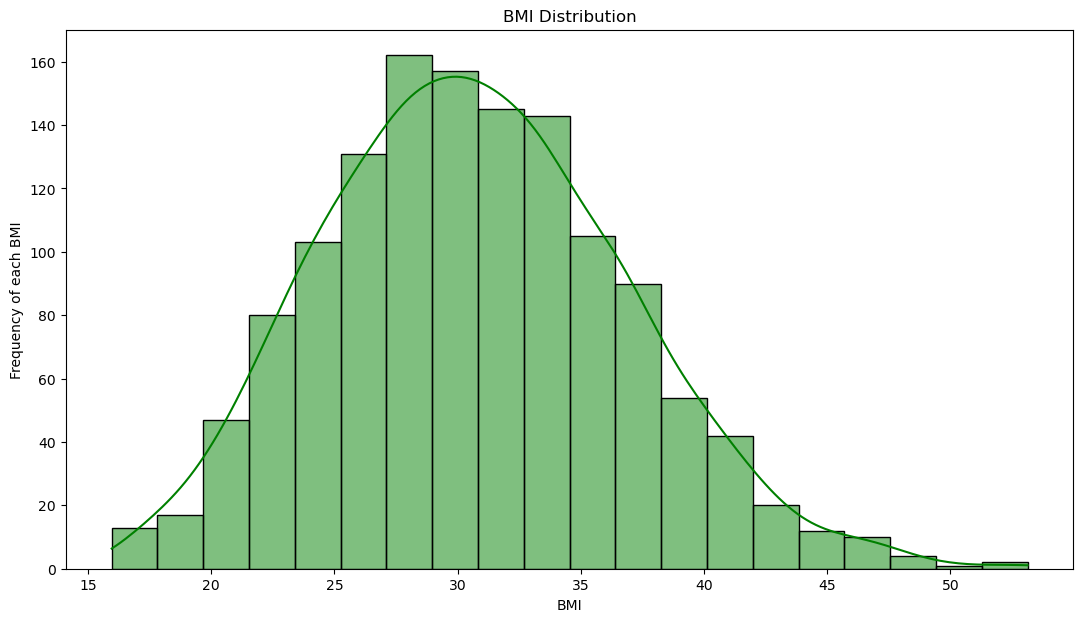

In [13]:
plt.figure(figsize=(13,7))
sns.histplot(data.bmi, bins = 20, kde = True, color = 'green')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency of each BMI')
plt.show()

*The majority of the people have BMI in between 25 and 40, which is considered as overweight and could be a major factor in increasing the medical cost*

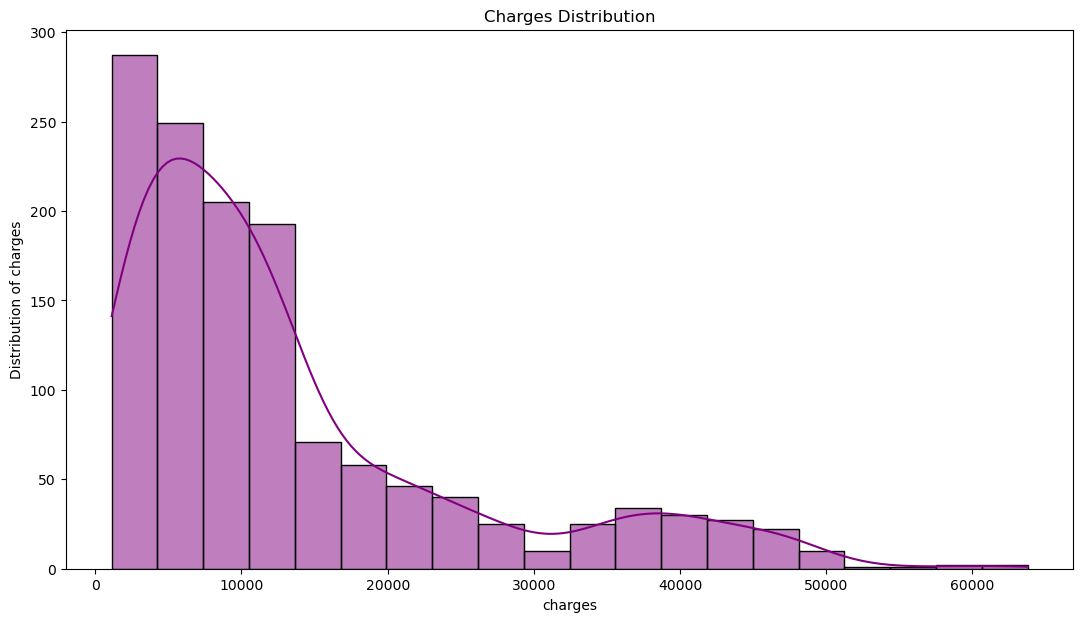

In [18]:
#checking charges Distribution

plt.figure(figsize=(13,7))
sns.histplot(data.charges, bins = 20, kde = True, color = 'purple')

plt.title('Charges Distribution')
plt.xlabel('charges')
plt.ylabel('Distribution of charges')
plt.show()

***Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000***

Bi-variate Analysis

<Figure size 1300x700 with 0 Axes>

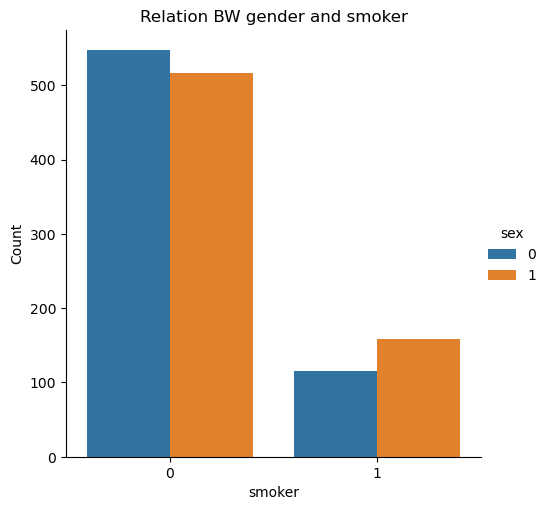

In [20]:
# Relation between gender and smoker

plt.figure(figsize=(13,7))
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', data = data)

plt.title('Relation BW gender and smoker')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()

***We can say that male smokers is more in number so I will assume that medical treatment expenses for male would be more than female***

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

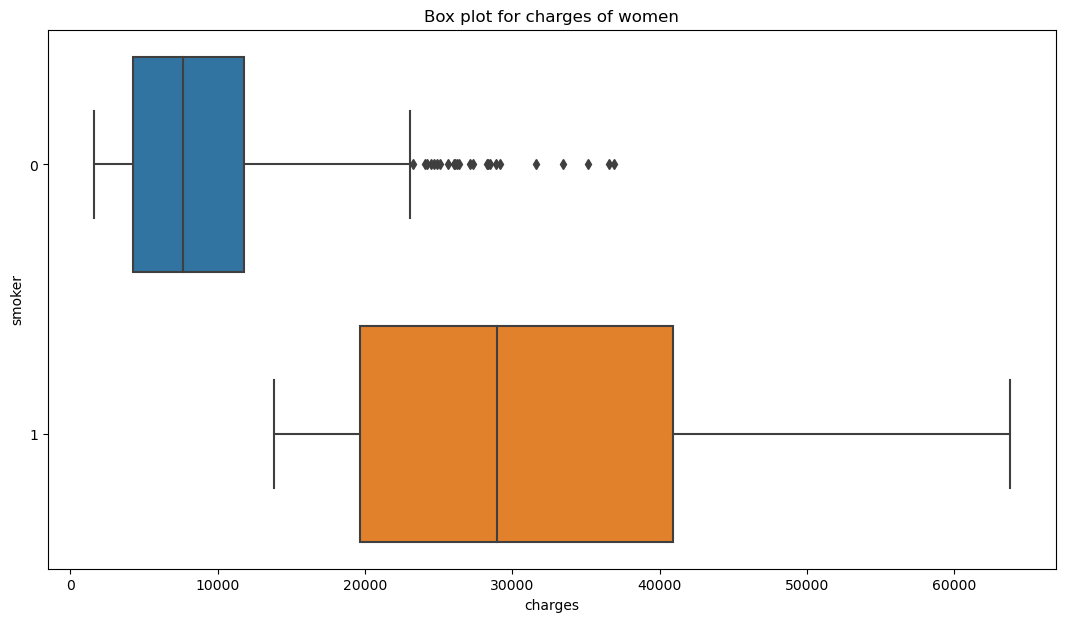

In [21]:
plt.figure(figsize=(13,7))
plt.title('Box plot for charges of women')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 0)], orient = 'h')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

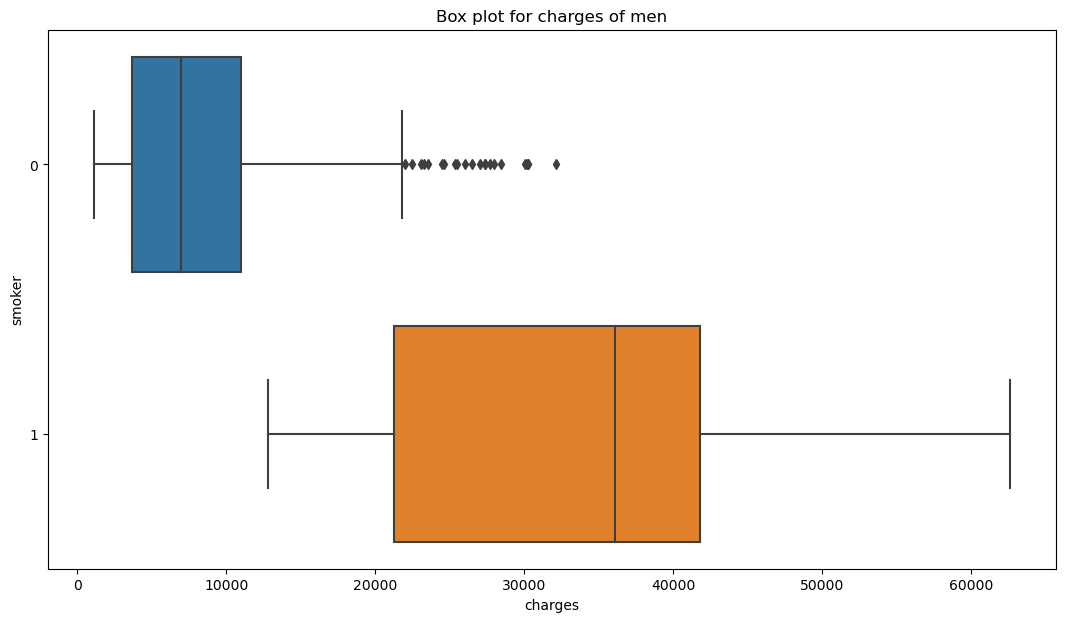

In [22]:
plt.figure(figsize=(13,7))
plt.title('Box plot for charges of men')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 1)], orient = 'h')

*The assumption is true, that the medical expenses of males is greater than that of females. in addition to that medical expenses of smokers is greater than that of non-smoker*

In [23]:
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<Axes: >

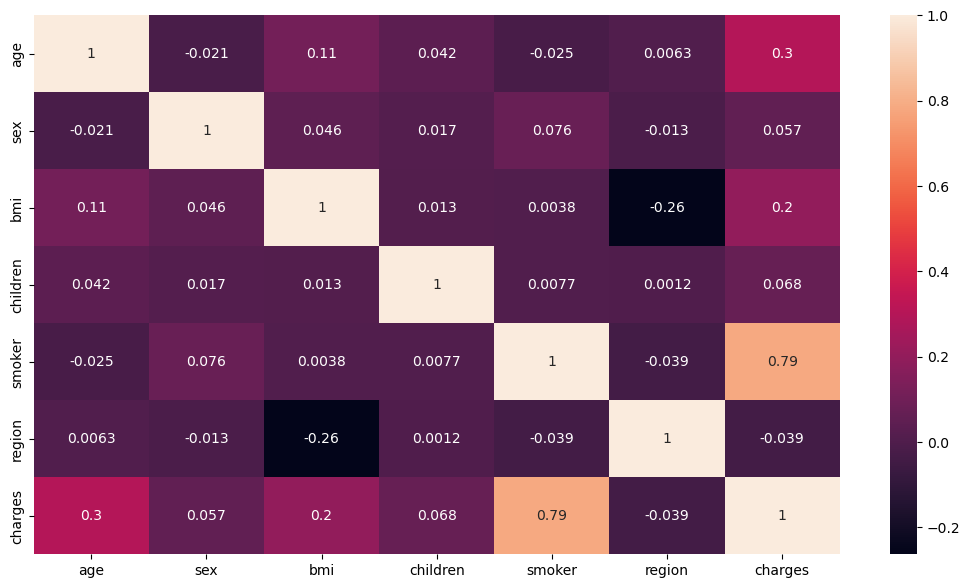

In [26]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True)

***By observing above plot we can state that the smokers has more medical expenses so it has a high impact on insurance charges followed by age and bmi whereas region, gender and children has no impact***

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1300x700 with 0 Axes>

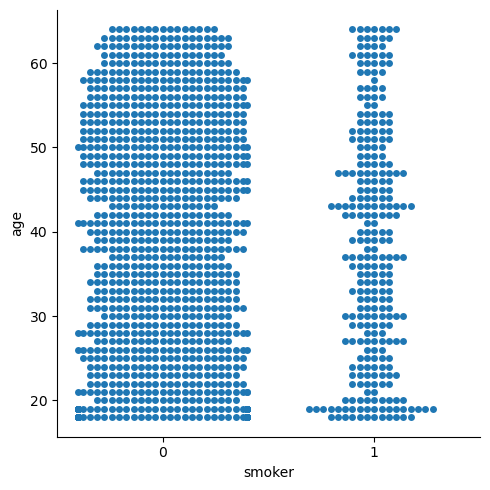

In [25]:
# relation between smokers and age distribution

plt.figure(figsize=(13,7))
sns.catplot(x = 'smoker', y = 'age', kind = 'swarm', data = data)

***From the above graph, we can observe that there is significant number of smokers at the age 19.***

## Multi-variate Analysis

In [27]:
# whenever we have more than 2 variables to analyse then it is multi-variate

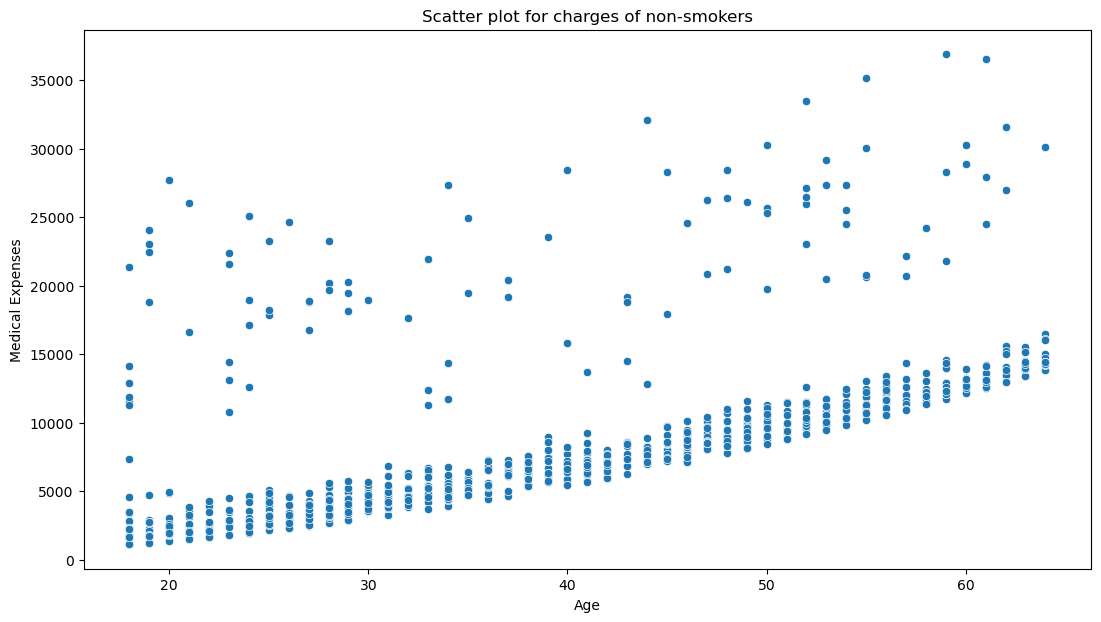

In [29]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'age', y = 'charges', data = data[(data.smoker == 0)])
plt.title("Scatter plot for charges of non-smokers")
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()


*Majority of the points shows that medical expenses increases with the age which may due to the fact that older people are more prone to illness. But there are some outliers which shows other illness or expenses which may lead to increase in medical expenses.*

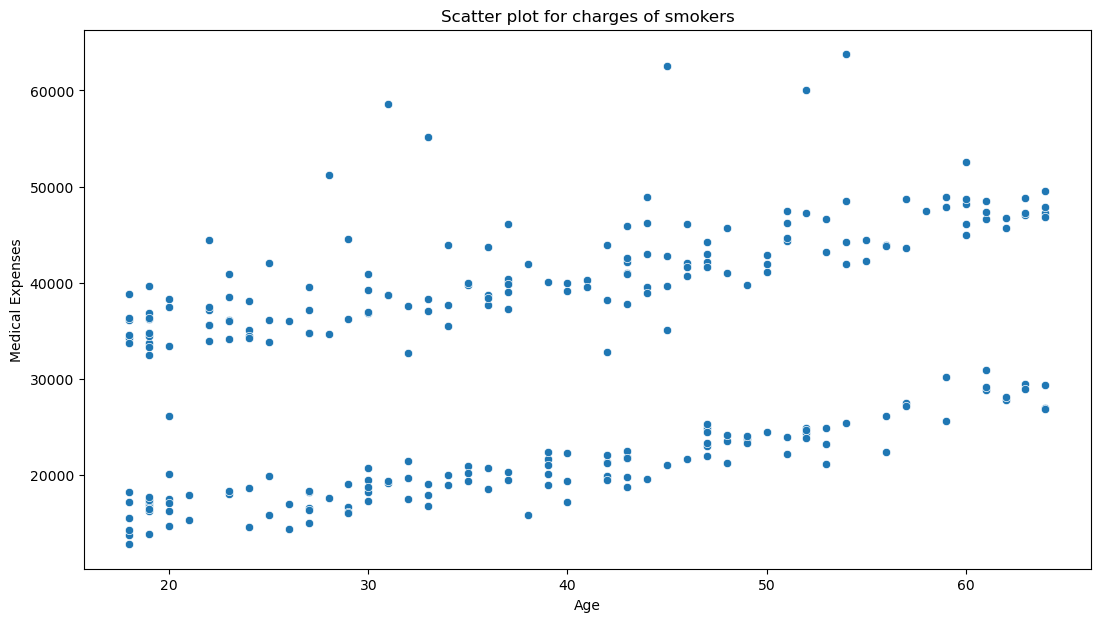

In [30]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'age', y = 'charges', data = data[(data.smoker == 1)])
plt.title("Scatter plot for charges of smokers")
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

*In this graph there are 2 segments, one with high medical expenses which may due to the smoking related illness and other with low medical expenses which may due to age related illness.*

Now in order to get more clear we can combine both the graphs.

<Figure size 1300x700 with 0 Axes>

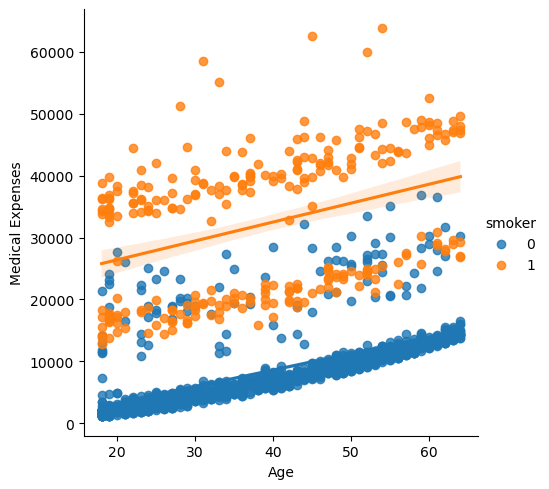

In [31]:
#Age cahrges distribution

plt.figure(figsize=(13,7))
sns.lmplot(x='age', y='charges', data = data, hue = 'smoker')
plt.xlabel("Age")
plt.ylabel("Medical Expenses")
plt.show()

*Now, we can clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers irrespective of age. In non-smokers, the cost of treatment increases with the age which obvious.*

<Figure size 1400x800 with 0 Axes>

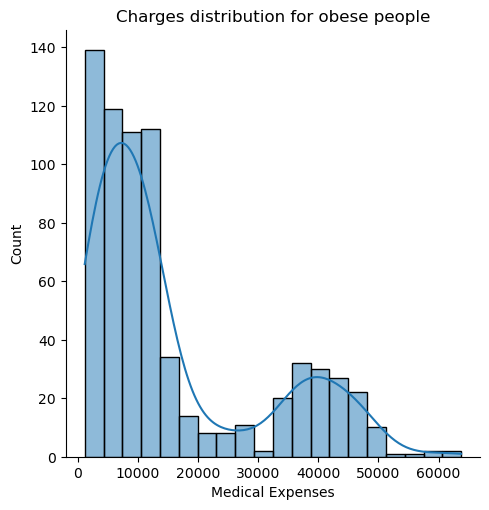

In [34]:
## Relation between BMI and Medical expenses

plt.figure(figsize=(14,8))
sns.displot(data[(data.bmi > 30)]['charges'], kde = True)
plt.title("Charges distribution for obese people")
plt.xlabel('Medical Expenses')
plt.show()

<Figure size 1400x800 with 0 Axes>

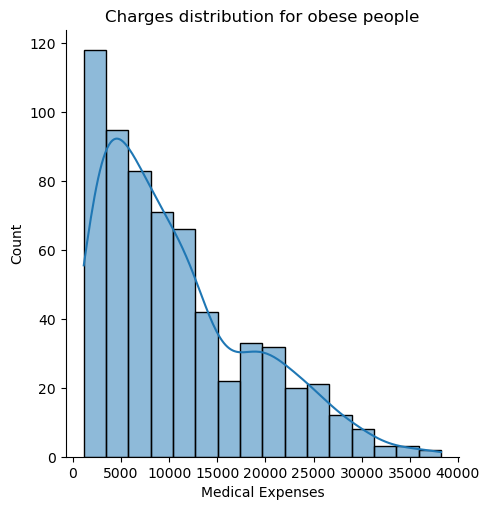

In [35]:
plt.figure(figsize=(14,8))
sns.displot(data[(data.bmi < 30)]['charges'], kde = True)
plt.title("Charges distribution for obese people")
plt.xlabel('Medical Expenses')
plt.show()

*Therefore, people with bmi less than 30 are spending less where as people with bmi more than 30 are spending more.*

## Feature Selection

In [43]:
## Dropping irrelevant column

data .drop('region', axis = 1, inplace = True)

In [44]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


 # Model Building

## Linear regression

In [49]:
X = data.drop('charges', axis = 1)
y = data.charges

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [52]:
# Linear Regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

reg.fit(X_train,y_train) #Fit the training data on a Linear Regression Model

LinearRegression()

In [53]:
# Making Prediction on test data

y_pred = reg.predict(X_test)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R2 Score: ", metrics.r2_score(y_test, y_pred))

MAE: 4180.786422973237
MSE: 37940112.46683446
RMSE: 6159.554567242218
R2 Score:  0.7486163979240839


# Polynomial regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [57]:
# Transforming the feature to higher degree

X_train_poly = poly_reg.fit_transform(X_train)

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_train, test_size = 0.2, random_state = 42)

In [58]:
# train the model

plr = LinearRegression()
plr.fit(X_train, y_train)

LinearRegression()

In [59]:
# Making Prediction on test data

y_pred_plr = plr.predict(X_test)

In [62]:
# Model Evaluation

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))

print("R2 Score: ", metrics.r2_score(y_test, y_pred_plr))


MAE: 2968.0675866169754
MSE: 23550005.973416638
RMSE: 4852.834838876823
R2 Score:  0.7998931111191244


# Result: My model is able to explain 80% of the total data set.

## Making a prediction system

In [64]:
 data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [68]:
# input the values

age = 21
sex = 1
bmi = 27
children = 0
smoker = 1


In [69]:
# predicting the price using random forest regression

charge = reg.predict([[age, sex, bmi, children, smoker]])
print('The charge of this new patient is $', charge[0])

The charge of this new patient is $ 25746.78028379008


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
